In [34]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df_skill = pd.read_csv("skill_level.csv", index_col=0)
df_skill

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
A,7,6,9,10,8
B,2,2,4,3,5
C,7,5,6,5,7
D,7,6,10,9,9
E,9,9,3,4,6
F,6,6,9,9,8
G,3,2,5,6,4
H,10,9,9,8,10
I,5,4,8,5,7
J,2,2,4,3,2


In [36]:
from sklearn.decomposition import PCA
model_dim = PCA(n_components=2)
vecs_list = model_dim.fit_transform(df_skill)
vecs_list

array([[ 3.54540932,  2.87737299],
       [-6.6988638 , -0.65033509],
       [-0.16494841, -1.22336675],
       [ 3.94480771,  3.08691447],
       [ 1.36177017, -6.27925406],
       [ 2.66043708,  2.67667561],
       [-5.20580234,  1.03255023],
       [ 6.95188276, -0.32590835],
       [-1.13081783,  1.09025207],
       [-7.96087192, -1.15843017],
       [-2.1553897 ,  1.79230952],
       [ 5.12151644, -2.50609836],
       [-2.72265636,  0.06253482],
       [-1.60087574,  1.24847108],
       [ 4.05440262, -1.72368801]])

In [37]:
model_dim.explained_variance_ratio_

array([0.71235597, 0.21434312])

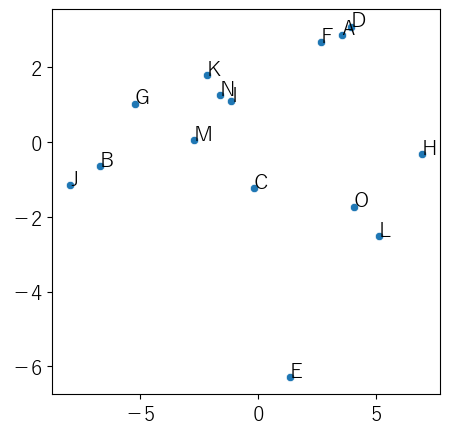

In [38]:
X=vecs_list[:,0]
Y=vecs_list[:,1]

plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 5))

sns.scatterplot(x=X,y=Y)
for i, (pointname_x, pointname_y) in enumerate(zip(X, Y)):
    plt.annotate(df_skill.index[i], xy=(pointname_x, pointname_y))

In [39]:
df_skill.sum(axis=1).sort_values()

J    13
B    16
G    20
M    25
K    27
N    28
I    29
C    30
E    31
F    38
O    39
A    40
L    41
D    41
H    46
dtype: int64

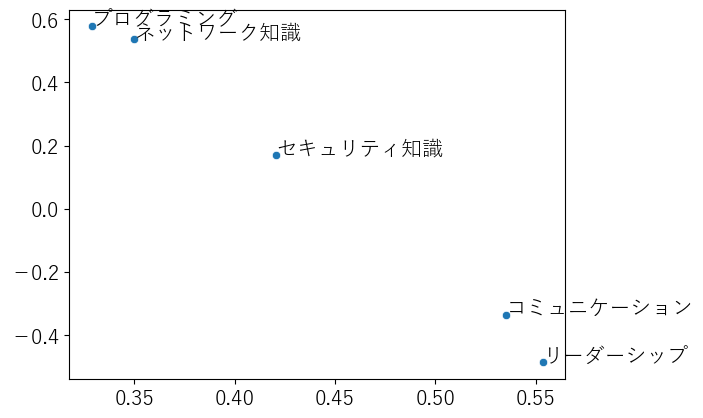

In [40]:
X_comp, Y_comp = model_dim.components_

sns.scatterplot(x=X_comp, y=Y_comp)
for i, (pointname_x, pointname_y) in enumerate(zip(X_comp, Y_comp)):
    plt.annotate(df_skill.columns[i], xy=(pointname_x, pointname_y))

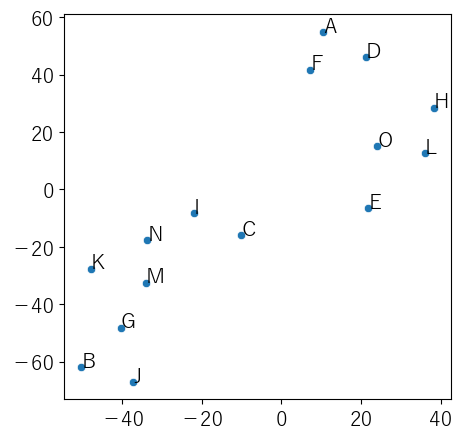

In [41]:
#import umap.umap_ as umap
from sklearn.manifold import TSNE
from scipy.sparse.csgraph import connected_components

model_dim = TSNE(n_components=2, perplexity=5)
tsne_result = model_dim.fit_transform(df_skill)

X=tsne_result[:,0]
Y=tsne_result[:,1]

plt.rcParams["font.family"] = "Yu Gothic"
plt.rcParams["font.size"] = 15
plt.figure(figsize=(5, 5))

sns.scatterplot(x=X,y=Y)
for i, (pointname_x, pointname_y) in enumerate(zip(X, Y)):
    plt.annotate(df_skill.index[i], xy=(pointname_x, pointname_y))

In [42]:
#クラスタリング
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

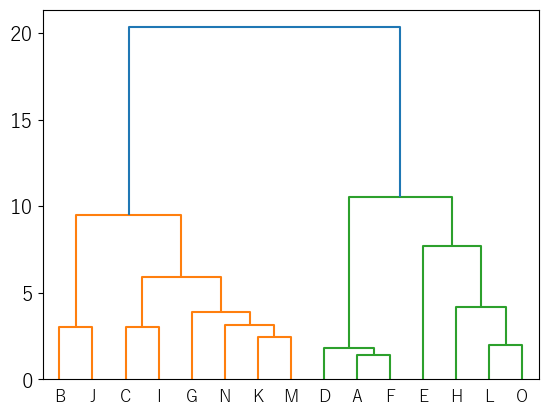

In [43]:
linkage_result = linkage(df_skill, method="ward") #single, complete, averageも
dendrogram(linkage_result, labels=df_skill.index)
plt.show()

In [44]:
from sklearn.cluster import KMeans

vec = KMeans(n_clusters=4)
group_num = vec.fit_predict(df_skill)

In [45]:
df_skill2 = df_skill.copy()
df_skill2["グループ名"] = group_num
df_skill2.groupby("グループ名").mean()

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識
グループ名,,,,,
0,2.000000,2.000000,4.000000,3.000000,3.500000
1,8.333333,8.166667,7.333333,7.666667,8.166667
2,5.750000,4.750000,7.500000,6.500000,6.750000
3,3.666667,3.000000,5.000000,6.666667,5.666667


<Axes: >

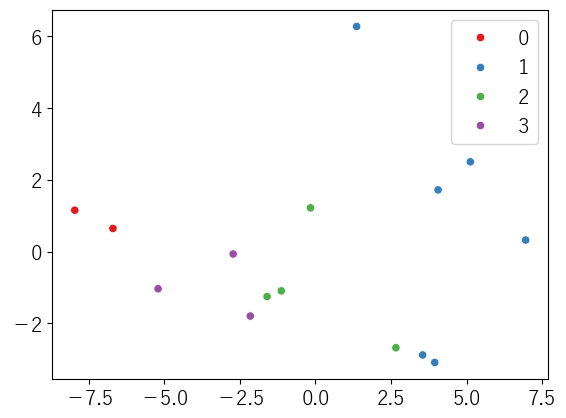

In [46]:
PCAresult = PCA(n_components=2)
vecs_list= PCAresult.fit_transform(df_skill)
X= vecs_list[:,0]
Y= vecs_list[:,1]*-1

sns.scatterplot(x=X,y=Y, hue=group_num, 
                palette="Set1")

In [47]:
from sklearn.decomposition import TruncatedSVD
SVDresult = TruncatedSVD(n_components=2)
vecs_list= SVDresult.fit_transform(df_skill)
df_skill2["SVD_X"]= vecs_list[:,0]
df_skill2["SVD_Y"]= vecs_list[:,1]
df_skill2.head()

,コミュニケーション,リーダーシップ,プログラミング,ネットワーク知識,セキュリティ知識,グループ名,SVD_X,SVD_Y
A,7,6,9,10,8,1,18.011336,-2.089600
B,2,2,4,3,5,0,7.277623,-1.348503
C,7,5,6,5,7,2,13.433608,0.887195
D,7,6,10,9,9,1,18.482640,-2.209470
E,9,9,3,4,6,1,13.578064,6.187699


<Axes: xlabel='SVD_X', ylabel='SVD_Y'>

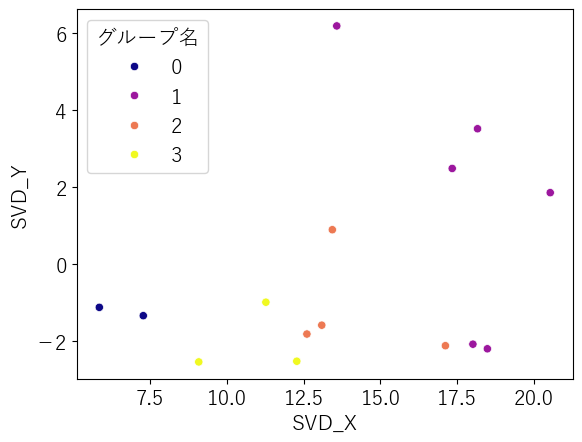

In [48]:
sns.scatterplot(data=df_skill2, 
                x="SVD_X",y="SVD_Y", hue="グループ名",
                palette="plasma")